## Data Cleaning Challenge:

Clean the data, then
- Determine the five most common journals and the total articles for each. 
- Next, calculate the mean, median, and standard deviation of the open-access cost per article for each journal.
- Bonus: identify prices paid by subject area 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
!pwd

/Users/sjadallah/Desktop/Thinkful_data/Exercises


In [3]:
#import data set and account for uni-code errors 
wellcome = pd.read_csv('WELLCOME APCspend2013.csv', encoding = "ISO-8859-1")
wellcome.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [4]:
wellcome.dtypes

PMID/PMCID                                             object
Publisher                                              object
Journal title                                          object
Article title                                          object
COST (£) charged to Wellcome (inc VAT when charged)    object
dtype: object

### 1) Remove columns we don't need, rename columns & resolve NaN values

In [5]:
#Remove PMID Column
wellcome.drop('PMID/PMCID', axis=1, inplace=True)
wellcome.head()

,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [6]:
#Rename Cost column
wellcome.rename(columns={'COST (£) charged to Wellcome (inc VAT when charged)': 'Cost'}, inplace=True)
wellcome.head()

,Publisher,Journal title,Article title,Cost
0,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [7]:
#Search for NaN values
wellcome.isnull().any()

Publisher        False
Journal title     True
Article title    False
Cost             False
dtype: bool

In [8]:
#identify where NaN values are
wellcome.loc[wellcome['Journal title'].isnull()]

,Publisher,Journal title,Article title,Cost
986,MacMillan,NaN,Fungal Disease in Britain and the United State...,£13200.00


In [9]:
#Replace Nan value
wellcome.fillna('Not Provided', inplace=True)
print(wellcome.isnull().sum())
wellcome.loc[wellcome['Publisher']=='MacMillan']

Publisher        0
Journal title    0
Article title    0
Cost             0
dtype: int64


,Publisher,Journal title,Article title,Cost
986,MacMillan,Not Provided,Fungal Disease in Britain and the United State...,£13200.00


### 2) Clean up Cost column and make it a float 

In [10]:
#First find out if there are any other symbols in the column
wellcome['A'] = wellcome['Cost'].str[:1]
wellcome['A'].unique()

array(['£', '1', '2', '6'], dtype=object)

In [11]:
#Remove temporary A column
wellcome.drop('A', axis=1, inplace=True)
wellcome.head()

,Publisher,Journal title,Article title,Cost
0,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [12]:
#Remove the currency symbol & change dtype to float
#Added "$" because it was found in one of the records
wellcome['Cost']=wellcome['Cost'].astype(str).str.replace('£','').str.replace('$','')
wellcome['Cost']=wellcome['Cost'].astype(np.float)
wellcome.dtypes

Publisher         object
Journal title     object
Article title     object
Cost             float64
dtype: object

In [13]:
#Dropping extreme value of 999999 & 0
wellcome=wellcome[wellcome.Cost !=999999]
wellcome=wellcome[wellcome.Cost !=0]
wellcome['Cost'].value_counts()

2040.00    94
1500.00    37
2400.00    32
2100.00    30
1800.00    28
3000.00    26
1700.00    21
825.68     19
1834.77    18
2034.00    17
852.00     16
1680.00    16
1920.00    13
2340.00    11
3120.00    11
2010.24    11
1620.00    10
1704.00     8
1536.00     8
1260.00     8
2145.60     7
1836.92     7
1044.00     7
1939.95     6
1315.80     6
2377.65     6
2520.00     6
2415.37     6
2184.22     6
2625.60     6
           ..
2381.62     1
1301.25     1
1639.06     1
886.30      1
159.74      1
1160.09     1
2381.04     1
572.74      1
2468.74     1
1745.00     1
967.18      1
1930.88     1
614.73      1
1670.77     1
1758.89     1
1439.45     1
1157.88     1
1889.00     1
750.16      1
2232.74     1
1694.68     1
187.03      1
747.05      1
1577.90     1
1676.06     1
1551.49     1
1809.51     1
1309.50     1
2363.76     1
1883.71     1
Name: Cost, Length: 1393, dtype: int64

In [33]:
wellcome['Cost'].sum()

4191279.12

### 3) Clean up Journal Titles

In [14]:
#Get list & count of unique Journal titles
wellcome['Journal title'].value_counts()

PLoS One                                                   90
PLoS ONE                                                   59
Journal of Biological Chemistry                            47
Nucleic Acids Research                                     21
Proceedings of the National Academy of Sciences            19
PLoS Neglected Tropical Diseases                           18
Human Molecular Genetics                                   17
Nature Communications                                      16
Neuroimage                                                 15
NeuroImage                                                 14
BMC Public Health                                          14
Brain                                                      14
PLoS Pathogens                                             13
PLoS Genetics                                              13
Movement Disorders                                         13
Biochemical Journal                                        12
Developm

In [15]:
#Make journal titles all lowercase 
wellcome['Journal title']=wellcome['Journal title'].str.lower()

#Remove any white spaces
wellcome['Journal title']=wellcome['Journal title'].str.strip()

#Capitalize first letters of each word
wellcome['Journal title']=wellcome['Journal title'].str.title()

#reduced count from 985 to 929 and now 895

In [16]:
wellcome['Journal title'].value_counts()

Plos One                                               183
Journal Of Biological Chemistry                         52
Neuroimage                                              29
Nucleic Acids Research                                  26
Plos Genetics                                           22
Proceedings Of The National Academy Of Sciences         22
Plos Pathogens                                          22
Plos Neglected Tropical Diseases                        20
Nature Communications                                   18
Human Molecular Genetics                                18
Movement Disorders                                      15
Brain                                                   14
Bmc Public Health                                       14
Journal Of Neuroscience                                 13
Developmental Cell                                      12
Biochemical Journal                                     12
Journal Of General Virology                             

### 4) Clean up Article String

In [17]:
#Get profile of Article string
wellcome['Article title'].value_counts()

Exclusive breastfeeding, diarrhoel morbidity and all-couse mortality in infnats of HIV infected                                                                                                            2
Body mass index and self-perception of overweight and obesity in rural, urban, and rural-to-urban migrants: Peru Migrants                                                                                  1
Pyrimidine Biosynthesis is not an essential function for T brucei bloodstream forms                                                                                                                        1
The role of prestimulus activity in visual extinction                                                                                                                                                      1
The 5S RNP couples ribosome biogenesis to the home                                                                                                                                  

In [18]:
#Make Article titles all lowercase 
wellcome['Article title']=wellcome['Article title'].str.lower()

#Remove any white spaces
wellcome['Article title']=wellcome['Article title'].str.strip()

#Capitalize first letters of each word
wellcome['Article title']=wellcome['Article title'].str.title()

#reduced count from 2126 to 2126; no impact on consolidation.  

### 5) Determine the 5 Most Common Journals & their articles and perform summary stats on data set

In [19]:
#Create truncated df for top 5 journals
topfive=pd.DataFrame(wellcome['Journal title'].value_counts()[:5])
topfive.head()

,Journal title
Plos One,183
Journal Of Biological Chemistry,52
Neuroimage,29
Nucleic Acids Research,26
Plos Genetics,22


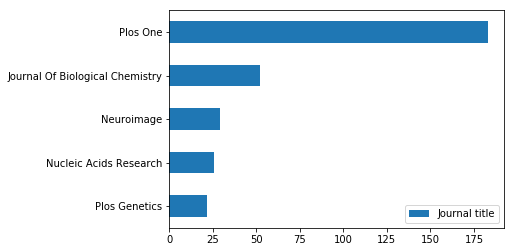

In [20]:
#Plot to show the top 5 journals and article count
topfive.sort_values(by=['Journal title'], ascending=True).plot(kind='barh', use_index=True)

In [41]:
#Calculate total cost and article count by Journal title
wellcome.groupby(['Journal title']).agg({ 'Cost': 'sum','Article title':'count'})

,Cost,Article title
Journal title,,
Academy Of Nutrition And Dietetics,2379.54,1
Acs Chemical Biology,7090.93,5
Acs Chemical Neuroscience,1186.80,1
Acs Nano,1336.28,2
"Acta Crystallographica Section D, Biological Crystallography",771.42,1
Acta Crystallographica Section D: Biological Crystallography,773.74,1
Acta Crystallographica Section F: Structural Biology And Crystallization Communications,1593.27,2
"Acta Crystallographica, Section D",757.18,1
Acta Crystallography D,774.19,1


In [38]:
#Calculating mean & st dev of costs by Journal title
wellcome.groupby(wellcome['Journal title']).describe()

Cost               \
                                                   count         mean   
Journal title                                                           
Academy Of Nutrition And Dietetics                   1.0  2379.540000   
Acs Chemical Biology                                 5.0  1418.186000   
Acs Chemical Neuroscience                            1.0  1186.800000   
Acs Nano                                             2.0   668.140000   
Acta Crystallographica Section D,  Biological C...   1.0   771.420000   
Acta Crystallographica Section D: Biological Cr...   1.0   773.740000   
Acta Crystallographica Section F: Structural Bi...   2.0   796.635000   
Acta Crystallographica, Section D                    1.0   757.180000   
Acta Crystallography D                               1.0   774.190000   
Acta D                                               1.0   750.160000   
Acta Dermato Venereologica                           1.0   653.960000   
Acta Diabetologica                                   1.0  2336.280000   
Acta F                                               1.0   754.900000   
Acta Neuropathol                                     1.0  1901.040000   
Acta Neuropathologica                                3.0  2161.063333   
Acta Opthalmologica                                  1.0  2270.160000   
Acta Physiol                                         1.0  1991.500000   
Addiction                                            2.0  2136.225000   
Advances In Experimental Medicine And Biology        4.0  1928.457500   
Age                                                  2.0  2170.140000   
Age And Ageing                                       1.0  2040.000000   
Ageing & Society                                     1.0  1695.000000   
Aging Cell                                           1.0  1970.570000   
Aids                                                 3.0  2059.306667   
Aids Behav                                           1.0  1834.770000   
Aids Care                                            4.0  2294.225000   
Aids Journal                                         1.0  2015.720000   
Aids Research And Therapy                            1.0  1240.000000   
Aids Uk                                              2.0  1836.920000   
Alcohol And Alcoholism                               1.0  2040.000000   
...                                                  ...          ...   
Tissue Engineering: Part A                           1.0  1741.320000   
Traffic                                              6.0  2129.338333   
Transactions Of The Royal Society Of Tropical M...   1.0  1524.080000   
Translational Psychiatry                             2.0  2880.000000   
Trends In Cognitive Science                          1.0  2340.630000   
Trends In Genetics                                   2.0  2370.935000   
Trends In Microbiology                               1.0  2291.330000   
Trends In Molecular Medicine                         1.0  2248.330000   
Trends In Neuroscience                               1.0  2402.810000   
Trends In Neurosciences                              1.0  2426.960000   
Trends In Parasitology                               3.0  2257.653333   
Trials                                               4.0  1200.475000   
Trop Med Int Health                                  1.0  1834.770000   
Tropical Animal Health & Production                  1.0  2054.780000   
Tropical Medicine And International Health           6.0  1843.163333   
Tuberculosis                                         2.0  2161.255000   
Urban History                                        1.0  2034.000000   
Urolithiasis                                         1.0  1112.400000   
Vaccine                                              5.0  1623.394000   
Vascular Pharmacology                                1.0  2352.530000   
Veterinary Microbiology                              1.0  2451.490000   
Veterinary Parasitology              

In [42]:
#Calculating median costs by Journal title
wellcome.groupby(wellcome['Journal title']).median()

,Cost
Journal title,
Academy Of Nutrition And Dietetics,2379.540
Acs Chemical Biology,1294.590
Acs Chemical Neuroscience,1186.800
Acs Nano,668.140
"Acta Crystallographica Section D, Biological Crystallography",771.420
Acta Crystallographica Section D: Biological Crystallography,773.740
Acta Crystallographica Section F: Structural Biology And Crystallization Communications,796.635
"Acta Crystallographica, Section D",757.180
Acta Crystallography D,774.190
